# Get updates from Rachel

In [1]:
!cp ../rmcclure/procedure.py .

In [2]:
import numpy as np 
import pickle
from superfreq import SuperFreq
from matplotlib import pyplot as plt
from galpy.util import bovy_coords as coords
import gala.dynamics as gd
import astropy.units as u
import gala.coordinates as gc
import os
import sys
from procedure import *

/mnt/home/bbhattarai/.local/lib/python3.7/site-packages/galpy/util/bovy_coords.py:6: FutureWarning: galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_coords is being deprecated in favor of galpy.util.coords; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)



SyntaxError: invalid syntax (procedure.py, line 1091)

In [3]:
!pwd

/mnt/home/bbhattarai


# Checking how much sim has ran so far

In [4]:
times=np.genfromtxt(path+'times.txt',dtype='str')
print("Total snapshots present is",len(times))
snapshot_start=0
snapshot_end=len(times)

Total snapshots present is 1049


In [5]:
!hostname

pcn-5-41


In [6]:
plotpath="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/"

In [7]:
snapshot=1000
snaparr = loadwholesnap(path,snapshot)
print("These are the data we have",snaparr[0].dtype)
idd=snaparr['idd']
x=snaparr['x']
y=snaparr['y']
z=snaparr['z']
vx=snaparr['vx']
vy=snaparr['vy']
vz=snaparr['vz']  
mass=snaparr['mass']  #mass is in solar mass (change old mass calculations to take account of the factor 2.324876e9)

vr=snaparr['vr']
vphi=snaparr['vphi']
vzz=snaparr['vzz']
r=snaparr['r']
phi=snaparr['phi'] #phi is in radians

zz=snaparr['zz']

#converting phi to degrees
phi_degrees=np.rad2deg(phi)

These are the data we have [('t', '<f8'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('vr', '<f4'), ('vphi', '<f4'), ('vzz', '<f4'), ('r', '<f4'), ('phi', '<f4'), ('zz', '<f4'), ('mass', '<f4'), ('idd', '<u8')]


In [10]:
print(phi)
print(mass)
print(np.min(mass))
print(np.max(mass))

[1.9068024 2.6914594 1.1962945 ... 1.8640074 1.9105343 1.2200564]
[185.19353 185.19353 185.19353 ... 185.19353 185.19353 185.19353]
185.19353
482.0768


# calculating bar_angle

25.983305292939015


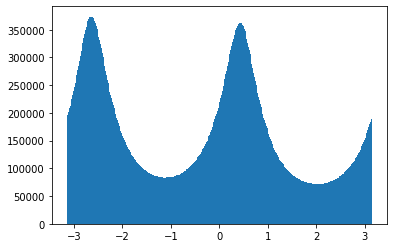

In [11]:
discindx=(mass<1e-7*2.324876e9)
barsample=(r>1)*(r<3)*discindx
counts, bins, patches=plt.hist(phi[barsample],bins=360,range=[-np.pi,np.pi])
ff=np.fft.fft(counts-np.mean(counts))
barangle=-np.angle(ff[2])/2.
barangle_degrees=np.rad2deg(barangle)

print(barangle_degrees)

26.151246829812


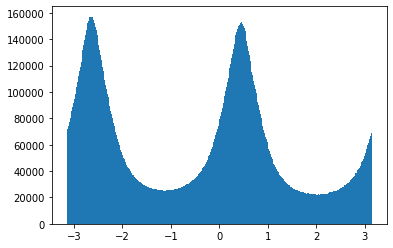

In [12]:
iscindx=(mass<1e-7*2.324876e9)
barsample=(r>2)*(r<3)*discindx
counts, bins, patches=plt.hist(phi[barsample],bins=360,range=[-np.pi,np.pi])
ff=np.fft.fft(counts-np.mean(counts))
barangle=-np.angle(ff[2])/2.
barangle_degrees=np.rad2deg(barangle)

print(barangle_degrees)

In [13]:
keep_sn=(x<8.1)*(x>8)*(y<0.5)*(y>-0.5)*(z<0.5)*(z>-0.5)

In [14]:
x_sn=x[keep_sn]
idd_sn=idd[keep_sn]
idd_sample=idd_sn[0:100]
print(len(idd_sample))
print(idd_sample)

100
[ 32899354 103617527 137786956 155556604  45993614 185067650 249264922
 165567122 185886719 227299264 226019809 161149805  35429436  57400962
 102597260 223752944 163024550  94213541  23543109 149556763 210754981
 117251533 149908906  76341097  83971995 200509782 225882347  13383935
 230092047 132728380 164289217  45332679 216854168 200190765  86675183
 174130105 175459475 177499598  24041536 209744527 216903315 101245640
 249949549 118091231 136696204  29307001 137626110   5232334  48610746
  13201123 126556712  28264701  35831924 224141687 197620227  88436611
 106664424 243906081 170946970 106913346 123327228  14223683 214557101
 161524250  18902154 131104031  13635034  92902017 211642944  87322542
 107317862 121556450  68464841  41833979  57524215  55865544 223013054
  73835106 188240957 196475746  66327842  61166019 206691602 209902289
 178860268  29982218 132277459  35832180  92355421  61365277 246578256
 223182372  64860707  28642749 179631521 146442231 125343050 170686113
  

In [37]:
idd_tracked=list()
test_particle=68464841
test = loadonesource(path,test_particle,start=0,finish=800)
#print(test)

In [38]:
print(test[0].dtype)

[('t', '<f8'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('vx', '<f4'), ('vy', '<f4'), ('vz', '<f4'), ('vr', '<f4'), ('vphi', '<f4'), ('vzz', '<f4'), ('r', '<f4'), ('phi', '<f4'), ('zz', '<f4'), ('mass', '<f4'), ('idd', '<u8')]


In [39]:
t=test['t']
#print(time)
x_test=test['x'].astype(np.float64)
y_test=test['y'].astype(np.float64)
z_test=test['z'].astype(np.float64)
vx_test=test['vx'].astype(np.float64)
vy_test=test['vy'].astype(np.float64)
vz_test=test['vz'].astype(np.float64)
mass_test=test['mass'].astype(np.float64)
r_test=test['r'].astype(np.float64)

lz_test=test['vphi'].astype(np.float64)*r_test

#w=np.array([x_test,y_test,z_test,vx_test,vy_test,vz_test])
#w=w.T
#w=np.double(w)
t=np.double(t)

w1 = gd.Orbit(
    pos=[x_test,y_test,z_test] * u.kpc,
    vel=[vx_test,vy_test,vz_test] * u.km/u.s,
    t=t*u.Gyr
)

w=w1.w([u.kpc,u.Gyr,u.Msun])

pp = gc.cartesian_to_poincare_polar(w1.w([u.kpc,u.Gyr,u.Msun]).T).T # use it if we have loop orbits
#check the Lz and check if it changes sign. If it doesn't change the sign do Poincare_polar
#if it changes, do w=w1.w([u.kpc,u.Gyr,u.Msun]) only


print("The total length of w:",len(w))

ntimes= w1.shape
ndim=6
print(ntimes,ndim)


The total length of w: 6
(800,) 6


In [40]:
print(pp)

[[ 8.55496940e+00  8.60796912e+00  8.66000303e+00 ...  7.25782967e+00
   7.62333795e+00  7.97475125e+00]
 [-4.98054979e+00 -4.52122302e+00 -4.00028289e+00 ...  4.56851889e+00
   4.25818341e+00  3.92254521e+00]
 [-8.45027566e-02 -6.93696812e-02 -4.86170389e-02 ... -2.51874775e-02
  -2.91576684e-02 -4.21863422e-02]
 [ 1.05764065e-01  1.05430035e-01  1.02428713e-01 ...  7.40327295e-01
   7.20327793e-01  6.82071044e-01]
 [ 3.41085843e+00  4.00031528e+00  4.52146967e+00 ... -2.34842590e+00
  -2.87500149e+00 -3.32038582e+00]
 [ 2.35527638e-02  3.64397476e-02  4.60687167e-02 ...  1.57420198e-03
  -1.72891534e-02 -3.44253470e-02]]


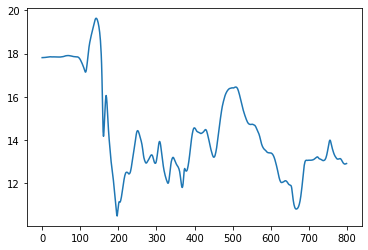

In [41]:
#print(lz_test)
plt.plot(lz_test)

In [45]:
sf = SuperFreq(t)
fs = [(pp[i] * 1j*pp[i+ndim//2]) for i in range(ndim//2)]

In [46]:
print(fs[0].dtype)
print(fs[0][0])
print(len(fs[0]))

complex128
0.9048083404227425j
800


In [47]:
#freqs, tbl, ix = sf.find_fundamental_frequencies(fs)

result = sf.find_fundamental_frequencies(fs)
freqs = result.fund_freqs
print(freqs)

#[-62.94689581  73.59547211  71.33269219]
#[ 49.84608317  49.90791238 -58.28416078]
#[ 36.02241878  49.84998162 -58.28416078]

[ 36.02241878  49.84998162 -58.28416078]


# we always want the bar to be at 25 degrees from the observer

In [20]:
rotation_angle=25-barangle_degrees
rot_angle_radians=np.deg2rad(rotation_angle)
x_rot=x*np.cos(rot_angle_radians)-y*np.sin(rot_angle_radians) #take care of radians and degress
y_rot=x*np.sin(rot_angle_radians)+y*np.cos(rot_angle_radians)
R_rot=(x_rot**2+y_rot**2)**(1/2)
phi_rot=np.arctan2(y_rot,x_rot) #this is different from the original phi
phi_rot=np.rad2deg(phi_rot)

Plot generated and saved to file:  1000_v_phi_vs_r_hexbin_rotated.jpg


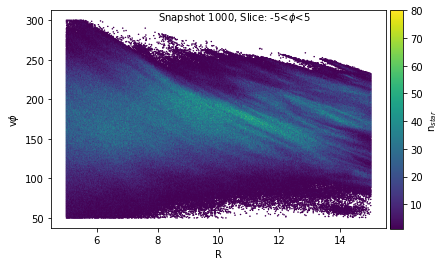

In [21]:
keep_phi=(phi_rot<5)*(phi_rot>-5)

fig2=plt.figure()
ax=fig2.add_subplot(111)
ax.text(8,300,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
cb1=ax.hexbin(r[keep_phi],vphi[keep_phi],extent=((5,15,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=80)
ax.set_xlabel("R")
ax.set_ylabel(r"v$\phi$")
cbar_ax = fig2.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig2.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_r_hexbin_rotated.jpg"
plotpath2="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/v_phi_vs_r/"
#fig2.savefig(plotpath2+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)

Plot generated and saved to file:  700x_rot_vs_y_rot_all.jpg


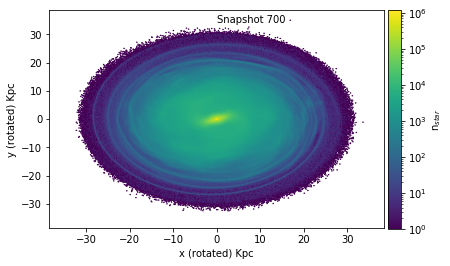

In [32]:
#figure3: ROTATED x vs y plot of the entire galaxy6
fig3=plt.figure()
ax=fig3.add_subplot(111)
ax.text(0,34,r"Snapshot %s "%(str(snapshot)))
cb1=ax.hexbin(x_rot,y_rot,extent=((-35,35,-35,35)),gridsize=500,mincnt=1,bins="log")
ax.set_xlabel("x (rotated) Kpc")
ax.set_ylabel("y (rotated) Kpc")
cbar_ax = fig3.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig3.colorbar(cb1, cax=cbar_ax)
cbar_ax.set_ylabel(r'n$_{star}$')
cbar_ax.yaxis.label.set_size(10)
plotname=str(snapshot)+"x_rot_vs_y_rot_all.jpg"
plotpath3="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/y_vs_x_rotated/"

#fig3.savefig(plotpath3+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)


In [ ]:
#figure4: x_rot_select=x_rot[keep_phi], y_rot_select=y_rot[keep_phi] (ROTATED x and y of the slected region)
fig4=plt.figure()
ax4=fig4.add_subplot(111)
ax4.text(5,3,r"Snapshot %s, Slice: -5<$\phi$<5"%(str(snapshot)))
#print("These are the rotated x and y ",x_rot[keep_phi])
#ax.plot(x,y)
x_rot_select=x_rot[keep_phi]
y_rot_select=y_rot[keep_phi]

cb4=ax4.hexbin(x_rot_select,y_rot_select,extent=((-1,35,-3,3)),gridsize=500,mincnt=1,bins="log")
ax4.set_xlabel("x")
ax4.set_ylabel("y")
cbar_ax4 = fig4.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig4.colorbar(cb4, cax=cbar_ax4)
cbar_ax4.set_ylabel(r'n$_{star}$')
cbar_ax4.yaxis.label.set_size(10)
plotname=str(snapshot)+"x_rot_vs_y_rot_selected_region.jpg"
plotpath4="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/y_vs_x_sliced/"

#fig4.savefig(plotpath4+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)

Plot generated and saved to file:  1000_v_phi_vs_vr_hexbin_rotated.jpg


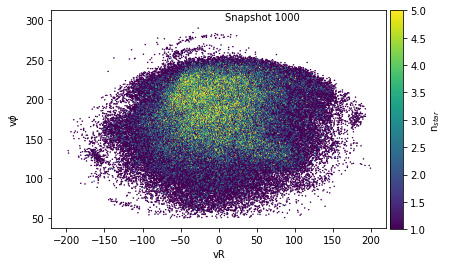

In [24]:
fig5=plt.figure()
ax5=fig5.add_subplot(111)
keep=(x_rot<8.5)*(x_rot>7.5)*(y_rot>-0.5)*(y_rot<0.5)*(z>-0.5)*(z<0.5)
vphi_select=vphi[keep]
vr_select=vr[keep]
ax5.text(8,300,r"Snapshot %s "%(str(snapshot)))
cb5=ax5.hexbin(vr_select,vphi_select,extent=((-200,200,50,300)),gridsize=500,mincnt=1,vmin=1,vmax=5)
ax5.set_xlabel("vR")
ax5.set_ylabel(r"v$\phi$")
cbar_ax5 = fig5.add_axes([0.91, 0.12, 0.03, 0.76]) # position of the colorbar (left, bottom, width, height)
fig5.colorbar(cb5, cax=cbar_ax5)
cbar_ax5.set_ylabel(r'n$_{star}$')
cbar_ax5.yaxis.label.set_size(10)
plotname=str(snapshot)+"_v_phi_vs_vr_hexbin_rotated.jpg"
plotpath5="/mnt/home/bbhattarai/resonance_sweeping/New_Sims_Analysis/plots/v_phi_vs_vr/"

#fig5.savefig(plotpath5+plotname,bbox_inches="tight")
print("Plot generated and saved to file: ",plotname)

#with open(local_datapath+filename, 'wb') as output:
#  pickle.dump(data, output)

In [22]:
print(len(snaparr['x']))

276078080
